# CS 5482 Network Science
## Project 3
## Due: 24 Oct 2020 at 9 AM


In [1]:
# Required Header
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.sparse import linalg
import networkx as nx
import numpy as np
import scipy as sp
import time
import random

### Question 1: Centrality Measures

a) Create a random undirected graph G with 30 nodes and probability 0.3


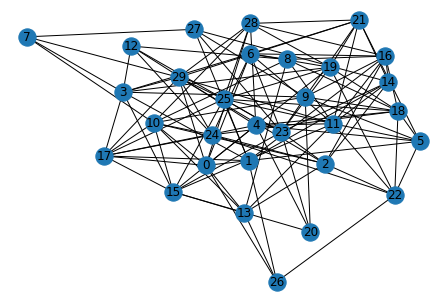

In [2]:
# Question 1 (a)
G = nx.fast_gnp_random_graph(30, 0.3, directed=False)
nx.draw(G, with_labels=True)

b) Compute the degree centrality two ways, 

1. Using Networkx library.
2. Write code to fetch the degrees of the node.

In [3]:
# Question 1 (b) - 1
nx.degree_centrality(G)

{0: 0.3103448275862069,
 1: 0.24137931034482757,
 2: 0.27586206896551724,
 3: 0.3103448275862069,
 4: 0.3448275862068966,
 5: 0.24137931034482757,
 6: 0.3103448275862069,
 7: 0.13793103448275862,
 8: 0.24137931034482757,
 9: 0.3103448275862069,
 10: 0.3448275862068966,
 11: 0.41379310344827586,
 12: 0.1724137931034483,
 13: 0.24137931034482757,
 14: 0.24137931034482757,
 15: 0.3103448275862069,
 16: 0.3103448275862069,
 17: 0.3103448275862069,
 18: 0.3103448275862069,
 19: 0.3103448275862069,
 20: 0.13793103448275862,
 21: 0.27586206896551724,
 22: 0.24137931034482757,
 23: 0.3448275862068966,
 24: 0.27586206896551724,
 25: 0.3103448275862069,
 26: 0.13793103448275862,
 27: 0.1724137931034483,
 28: 0.27586206896551724,
 29: 0.3448275862068966}

In [4]:
# Question 1 (b) - 2
deg_c = []
for i in range(len(G.nodes)):
    deg_c.append(G.degree[i] / (G.number_of_nodes()-1))
    print(i, " : ", deg_c[i])

0  :  0.3103448275862069
1  :  0.2413793103448276
2  :  0.27586206896551724
3  :  0.3103448275862069
4  :  0.3448275862068966
5  :  0.2413793103448276
6  :  0.3103448275862069
7  :  0.13793103448275862
8  :  0.2413793103448276
9  :  0.3103448275862069
10  :  0.3448275862068966
11  :  0.41379310344827586
12  :  0.1724137931034483
13  :  0.2413793103448276
14  :  0.2413793103448276
15  :  0.3103448275862069
16  :  0.3103448275862069
17  :  0.3103448275862069
18  :  0.3103448275862069
19  :  0.3103448275862069
20  :  0.13793103448275862
21  :  0.27586206896551724
22  :  0.2413793103448276
23  :  0.3448275862068966
24  :  0.27586206896551724
25  :  0.3103448275862069
26  :  0.13793103448275862
27  :  0.1724137931034483
28  :  0.27586206896551724
29  :  0.3448275862068966


c) Compute Eigen Vector Centrality for graph G.

1. Using Networkx library.
2. Write code to find the position of the largest eigenvalue and the eigenvectors of the graph


In [5]:
# Question 1 (c) - 1
nx.eigenvector_centrality(G)

{0: 0.1998864948830709,
 1: 0.13486549056024189,
 2: 0.17403195084335266,
 3: 0.18882912082281306,
 4: 0.22352849533261807,
 5: 0.1687256839844728,
 6: 0.2135472440100376,
 7: 0.08470929687338748,
 8: 0.16136605273771198,
 9: 0.1830211441535405,
 10: 0.20856360883066288,
 11: 0.26981720642793,
 12: 0.11256539955944993,
 13: 0.15417574094283906,
 14: 0.14914150161171266,
 15: 0.210247922179588,
 16: 0.20015175625243498,
 17: 0.2127312495112987,
 18: 0.20172337898556866,
 19: 0.21239690251499838,
 20: 0.09653032029835854,
 21: 0.19269625574103677,
 22: 0.151928666825336,
 23: 0.19708790753667557,
 24: 0.17827365851629157,
 25: 0.221424564756221,
 26: 0.07600800522879958,
 27: 0.08881481267136382,
 28: 0.20004376939443075,
 29: 0.2280092648260412}

In [6]:
# Question 1 (c) - 2

# w is ndarray Array of k eigenvalues. vndarray v[:, i] is the eigenvector corresponding to the eigenvalue w[i].
w, v = linalg.eigs(nx.to_numpy_matrix(G), k=1, which="LR") 
v = v.flatten().real
norm = np.sign(v.sum()) * sp.linalg.norm(v)
eigen= dict(enumerate(v/norm))
eigen

{0: 0.19988785375737436,
 1: 0.13486424277952583,
 2: 0.17403118259252368,
 3: 0.188828555869865,
 4: 0.22352978848479027,
 5: 0.16872664720373445,
 6: 0.21354707995234806,
 7: 0.08470878074519994,
 8: 0.16136603781228767,
 9: 0.18302013480060975,
 10: 0.2085638062814154,
 11: 0.26981750823436784,
 12: 0.11256524775718196,
 13: 0.1541760541132744,
 14: 0.1491397179193921,
 15: 0.21024796617405955,
 16: 0.20015075621792366,
 17: 0.2127317994789669,
 18: 0.201723919435906,
 19: 0.21239732276617307,
 20: 0.09652993136162284,
 21: 0.1926962951588892,
 22: 0.1519292400748373,
 23: 0.19708622533578887,
 24: 0.17827394829531712,
 25: 0.22142462993370252,
 26: 0.0760082655684181,
 27: 0.08881295895057958,
 28: 0.20004468679135862,
 29: 0.2280097421401873}

## Question 2) Algorithms

In this question you will read a graph from the edgelist file, the file consits of (u, v, w). Where (u, v) represents the edge, and w represents the weight of the edge.

In [8]:
# Read unweighted graph
import numpy as np
import networkx as nx
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

# Read weighted graph
def read_graph_weighted(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

'''
fb = read_graph(fileName)
n = len(fb)
m = len(fb.edges())
n, m
'''


'\nfb = read_graph(fileName)\nn = len(fb)\nm = len(fb.edges())\nn, m\n'

a). Compute all pair shortest path using the Floyd-Warshall algorithm mentioned in the class (powerpoint). (You may use networkx only for verification).
- Compare the time required to execute your algorithm with the networkx library
- Compute the algorithm for the graph provided as well as the facebook graph from snap (http://snap.stanford.edu/data/ego-Facebook.html)
- Make sure to use .gz file to load the data, do not uncompress.

In [46]:
#Question 2 for data.txt.gz without using NetworkX Lib
import math
start = time.time()
G = read_graph_weighted("data.txt.gz")
N = G.number_of_nodes()
GW = nx.adjacency_matrix(G, weight='weight') #GW is the weighted graph
GW =GW.todense()

#idx is the index for the matrix
idx = np.ones((N, N)) * np.nan
for v in G.nodes(): idx[v, v] = v
for e in G.edges(data=True): idx[e[0], e[1]] = e[1]
    
#setting the specified values of weighted matrix to infinity
for i in G.nodes():
    for j in G.nodes():
        if i != j and GW[i, j] == 0:
            GW[i, j] = 100000#math.inf

    
# Floyd_Warshall 
for k in G.nodes():
    for i in G.nodes():
        for j in G.nodes():
            GW[i, j] = min(GW[i, j], GW[i, k] + GW[k, j])
    
print(GW)
end = time.time()
T=end-start
print("\n\n Estimated Time (without NetworkX):  ",T)


[[ 0 59 82 ...  4  5  5]
 [59  0 66 ... 63 64 64]
 [82 66  0 ... 86 87 87]
 ...
 [ 4 63 86 ...  0  3  5]
 [ 5 64 87 ...  3  0  3]
 [ 5 64 87 ...  5  3  0]]


 Estimated Time (without NetworkX):   0.372852087020874


In [61]:
#Question 2 for data.txt.gz without using NetworkX Lib

start = time.time()
res = nx.floyd_warshall(G)
print(res)
end = time.time()
T=end-start
print("\n\n Estimated Time (with NetworkX):  ",T)

{0: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x00000166408E2F70>, {0: 0, 1: 59, 2: 82, 3: 50, 4: 80, 6: 7, 36: 1, 5: 15, 9: 143, 10: 157, 8: 141, 7: 102, 11: 55, 18: 147, 21: 196, 23: 146, 29: 166, 32: 174, 35: 201, 43: 327, 44: 139, 12: 317, 13: 7, 14: 56, 28: 2, 19: 2, 24: 94, 26: 110, 27: 85, 34: 134, 45: 999, 15: 55, 20: 72, 30: 286, 31: 326, 33: 222, 17: 40, 16: 40, 22: 197, 25: 291, 37: 2, 38: 3, 39: 3, 40: 4, 41: 5, 42: 5}), 1: defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x00000166408E2040>, {1: 0, 0: 59, 2: 66, 3: 40, 6: 66, 4: 132, 36: 60, 5: 74, 9: 127, 10: 208, 8: 131, 7: 161, 11: 114, 18: 206, 21: 248, 23: 198, 29: 225, 32: 226, 35: 253, 43: 386, 44: 198, 12: 376, 13: 66, 14: 115, 28: 61, 19: 61, 24: 153, 26: 169, 27: 144, 34: 193, 45: 1058, 15: 114, 20: 131, 30: 338, 31: 378, 33: 281, 17: 99, 16: 99, 22: 256, 25: 350, 37: 61, 38: 62, 39: 62, 40: 63, 41: 64, 

In [ ]:
#Question 2 for (http://snap.stanford.edu/data/ego-Facebook.html) without using NetworkX Lib

import math
start = time.time()
G_fb = read_graph_weighted("facebook_combined.txt.gz")
N = G_fb.number_of_nodes()
GW_fb = nx.adjacency_matrix(G_fb, weight='weight') #GW is the weighted graph
GW_fb =GW_fb.todense()

#idx is the index for the matrix
idx = np.ones((N, N)) * np.nan
for v in G_fb.nodes(): idx[v, v] = v
for e in G_fb.edges(data=True): idx[e[0], e[1]] = e[1]
    
#setting the specified values of weighted matrix to infinity
for i in G_fb.nodes():
    for j in G_fb.nodes():
        if i != j and GW_fb[i, j] == 0:
            GW_fb[i, j] = 100000#math.inf

    
# Floyd_Warshall 
for k in G_fb.nodes():
    for i in G_fb.nodes():
        for j in G_fb.nodes():
            GW_fb[i, j] = min(GW_fb[i, j], GW_fb[i, k] + GW_fb[k, j])
    
print(GW_fb)
end = time.time()
T=end-start
print("\n\n Estimated Time for Facebook data (without NetworkX):  ",T)

#could not get the output, its like running forever !!?

In [ ]:
#Question 2 for (http://snap.stanford.edu/data/ego-Facebook.html) using NetworkX Lib
start = time.time() 
res = nx.floyd_warshall(G_fb)
print(res)
end = time.time()
T=end-start
print("\n\n Estimated Time for Facebook data (with NetworkX):  ",T)

#could not get the output, its like running forever !!?

b). Compute the average path length of each node obtained by the Floyd-Warshall algorithm and plot a bar chart to represent the average path length on y-axis and the node number on the x-axis.

(You can use the networkx library to obtain the path of each node)

Text(0.5, 1.0, 'The average path Length Bar')

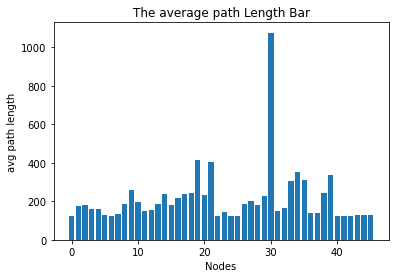

In [62]:
x = []
for i in range((np.array(GW).shape[0])):x.append(sum(np.array(GW)[i,:]))  
t = np.array(x)/GW.shape[0]
d =range(len(temp))
plt.bar(d, t)
plt.xlabel("Nodes")
plt.ylabel("avg path length")
plt.title("The average path Length Bar")

In [ ]:
x = []
for i in range((np.array(GW).shape[0])):x.append(sum(np.array(GW)[i,:]))  
t = np.array(x)/GW.shape[0]
d =range(len(temp))
plt.bar(d, t)
plt.xlabel("Nodes")
plt.ylabel("avg path length")
plt.title("The average path Length Bar")
#I could not plot because I did not got the result for facebook data 